# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [38]:
#Creating a dataframe so I can store the API data

city_dataframe=pd.DataFrame(cities)
city_dataframe.head()


,0
0,albany
1,nuqui
2,tuktoyaktuk
3,lasem
4,saint-philippe


In [39]:
#Changing the column 0 to City
city_dataframe=city_dataframe.rename(columns={0: "City"})
city_dataframe.head()

,City
0,albany
1,nuqui
2,tuktoyaktuk
3,lasem
4,saint-philippe


In [40]:
# set up additional columns to hold information
city_dataframe['Cloudiness'] = ""
city_dataframe['Country'] = ""
city_dataframe['Date'] = ""
city_dataframe['Humidity'] = ""
city_dataframe['Lat'] = ""
city_dataframe['Lng'] = ""
city_dataframe['Max Temp'] = ""
city_dataframe['Wind Speed'] = ""

city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,,,,,,,,
1,nuqui,,,,,,,,
2,tuktoyaktuk,,,,,,,,
3,lasem,,,,,,,,
4,saint-philippe,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather"
api_key="3674ad71a6f2083cd8258e5e84b2eeaa"
params= {"units": "Imperial",
    "appid": "3674ad71a6f2083cd8258e5e84b2eeaa"}

print("Beginning Data Retrieval")
print("-----------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in city_dataframe.iterrows():

    # get city name from dataframe
    city_name = row['City']
    
    # updating url address key value
    params['q'] = city_name

    # assembling url and make API requests
    print(f"Processing Record {index} of {city_name}")
    weather_response = requests.get(url, params=params).json()

    
    try:
        
        city_dataframe.loc[index,'Cloudiness'] = weather_response['clouds']['all']
        city_dataframe.loc[index,'Country'] = weather_response['sys']['country']
        city_dataframe.loc[index,'Date'] = weather_response['dt']
        city_dataframe.loc[index,'Humidity'] = weather_response['main']['humidity']
        city_dataframe.loc[index,'Lat'] = weather_response['coord']['lat']
        city_dataframe.loc[index,'Lng'] = weather_response['coord']['lon']
        city_dataframe.loc[index,'Max Temp'] = weather_response['main']['temp_max']
        city_dataframe.loc[index,'Wind Speed'] = weather_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")





Beginning Data Retrieval
-----------------------------
Processing Record 0 of albany
Processing Record 1 of nuqui
Processing Record 2 of tuktoyaktuk
Processing Record 3 of lasem
Processing Record 4 of saint-philippe
Processing Record 5 of los llanos de aridane
Processing Record 6 of yellowknife
Processing Record 7 of punta arenas
Processing Record 8 of cabo san lucas
Processing Record 9 of port alfred
Processing Record 10 of mataura
Processing Record 11 of barrow
Processing Record 12 of thunder bay
Processing Record 13 of mahebourg
Processing Record 14 of puerto ayora
Processing Record 15 of atuona
Processing Record 16 of bredasdorp
Processing Record 17 of cidreira
Processing Record 18 of trincomalee
Processing Record 19 of goure
Processing Record 20 of ponta do sol
Processing Record 21 of rikitea
Processing Record 22 of busselton
Processing Record 23 of alofi
Processing Record 24 of oksovskiy
Processing Record 25 of ushuaia
Processing Record 26 of beyneu
Processing Record 27 of illoqq

Processing Record 226 of tupik
Processing Record 227 of sao luis do quitunde
Processing Record 228 of ambilobe
Processing Record 229 of srednekolymsk
Processing Record 230 of raleigh
Processing Record 231 of magadan
Processing Record 232 of lebu
Processing Record 233 of castro
Processing Record 234 of great falls
Processing Record 235 of hobyo
Processing Record 236 of balabac
Processing Record 237 of tura
Processing Record 238 of port elizabeth
Processing Record 239 of nanortalik
Processing Record 240 of jakoruda
City not found. Skipping...
Processing Record 241 of vegreville
Processing Record 242 of codrington
Processing Record 243 of chokurdakh
Processing Record 244 of kushima
Processing Record 245 of inhambane
Processing Record 246 of kieta
Processing Record 247 of khatanga
Processing Record 248 of vestmanna
Processing Record 249 of ondjiva
Processing Record 250 of beloha
Processing Record 251 of hambantota
Processing Record 252 of hovd
Processing Record 253 of picota
Processing Rec

Processing Record 447 of tumannyy
City not found. Skipping...
Processing Record 448 of manchester
Processing Record 449 of kuytun
Processing Record 450 of vostok
Processing Record 451 of manado
Processing Record 452 of yatou
Processing Record 453 of cilegon
Processing Record 454 of asau
City not found. Skipping...
Processing Record 455 of bryan
Processing Record 456 of kamoke
Processing Record 457 of grand river south east
City not found. Skipping...
Processing Record 458 of vanimo
Processing Record 459 of coihaique
Processing Record 460 of richards bay
Processing Record 461 of garachine
Processing Record 462 of bereda
Processing Record 463 of ayamonte
Processing Record 464 of jega
Processing Record 465 of beira
Processing Record 466 of port augusta
Processing Record 467 of xuddur
Processing Record 468 of ust-nera
Processing Record 469 of umm kaddadah
Processing Record 470 of manokwari
Processing Record 471 of petropavlovsk-kamchatskiy
Processing Record 472 of saint-georges
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Saving it into csv
city_dataframe.to_csv("weatherdatahwassignment.py.csv")

In [26]:
city_dataframe.count()

City          618
Cloudiness    618
Country       618
Date          618
Humidity      618
Lat           618
Lng           618
Max Temp      618
Wind Speed    618
dtype: int64

In [27]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pisco,40,PE,1544918400,30,-13.71,-76.2,71.6,18.34
1,rikitea,0,PF,1544919378,100,-23.12,-134.97,78.45,1.92
2,arraial do cabo,0,BR,1544919567,86,-22.97,-42.02,78.49,20.6
3,busselton,92,AU,1544919567,100,-33.64,115.35,60.31,19.37
4,avarua,75,CK,1544918400,78,-21.21,-159.78,82.4,10.29


In [28]:
#Check data types
city_dataframe.dtypes

City          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lng           object
Max Temp      object
Wind Speed    object
dtype: object

In [29]:
# Conversion of objects to floats for the plots
city_dataframe['Cloudiness'] = pd.to_numeric(city_dataframe['Cloudiness'])
city_dataframe['Humidity'] = pd.to_numeric(city_dataframe['Humidity'])
city_dataframe['Lat'] = pd.to_numeric(city_dataframe['Lat'])
city_dataframe['Max Temp'] = pd.to_numeric(city_dataframe['Max Temp'])
city_dataframe['Wind Speed'] = pd.to_numeric(city_dataframe['Wind Speed'])

In [30]:
# Check data types
city_dataframe.dtypes

City           object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

In [31]:
#Dataframe Display
city_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pisco,40.0,PE,1544918400,30.0,-13.71,-76.2,71.60,18.34
1,rikitea,0.0,PF,1544919378,100.0,-23.12,-134.97,78.45,1.92
2,arraial do cabo,0.0,BR,1544919567,86.0,-22.97,-42.02,78.49,20.60
3,busselton,92.0,AU,1544919567,100.0,-33.64,115.35,60.31,19.37
4,avarua,75.0,CK,1544918400,78.0,-21.21,-159.78,82.40,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

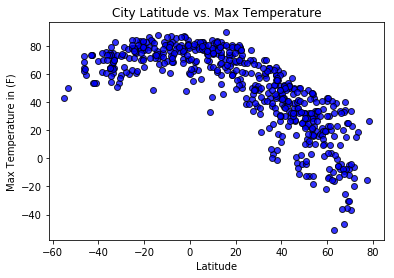

In [32]:
#Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Max Temp"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in (F)")



# Save the figure
plt.savefig("fig1")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

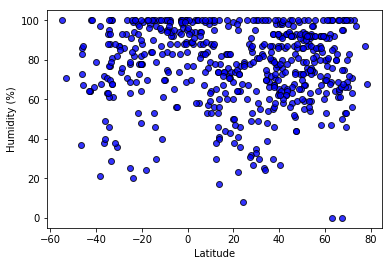

In [33]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Humidity"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("fig2")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

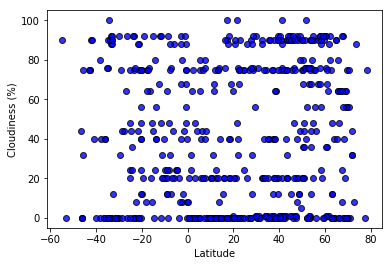

In [34]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Cloudiness"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("fig3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

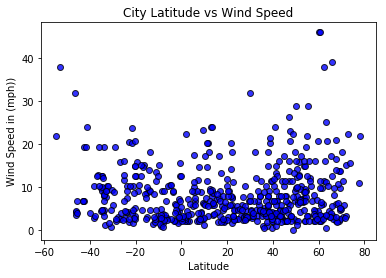

In [35]:
# Build a scatter plot for each data type
plt.scatter(city_dataframe["Lat"], city_dataframe["Wind Speed"], marker="o", facecolors="blue",edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
title = ("City Latitude vs Wind Speed")
plt.title(title)
plt.ylabel("Wind Speed in (mph))")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("fig4")

# Show plot
plt.show()